Retrieves images from "full_imgs" and stores each VOI separately in "train_imgs". Retrieves spreadsheet listing VOIs and stores them in text file. Requires data-retrieval to be run first.

In [1]:
import config
import csv
import helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
import transforms as tr
import voi_methods as vm
%matplotlib inline

In [2]:
importlib.reload(config)
importlib.reload(hf)
importlib.reload(tr)
importlib.reload(vm)
C = config.Config()

In [8]:
vm.reload_accnum("12090000", "colorectal", C)


Loading VOIs from sheet Colorectal
.Overall time: 1.803715705871582


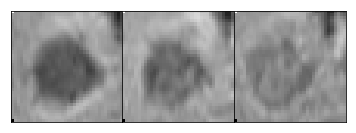

In [9]:
plot_check("colorectal", 2, "12090000_0")

In [343]:
for cls in C.classes_to_include:
    if not os.path.exists(C.orig_dir + cls):
        os.makedirs(C.orig_dir + cls)
    if not os.path.exists(C.aug_dir + cls):
        os.makedirs(C.aug_dir + cls)
    if not os.path.exists(C.crops_dir + cls):
        os.makedirs(C.crops_dir + cls)

In [105]:
final_size = C.dims

voi_df_art = pd.read_csv(C.art_voi_path)
voi_df_ven = pd.read_csv(C.ven_voi_path)
voi_df_eq = pd.read_csv(C.eq_voi_path)
intensity_df = pd.read_csv(C.int_df_path)

#C.classes_to_include = ['hcc', 'cholangio', 'colorectal', 'cyst', 'hemangioma', 'fnh']

Generate VOI cutouts

In [ ]:
with open(C.small_voi_path, 'r') as csv_file:
    reader = csv.reader(csv_file)
    small_vois = dict(reader)
for key in small_vois:
    small_vois[key] = [int(x) for x in small_vois[key][1:-1].split(', ')]

In [203]:
small_vois = {}
small_vois = vm.extract_vois(small_vois, C, voi_df_art, voi_df_ven, voi_df_eq, intensity_df)

with open(C.small_voi_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in small_vois.items():
        writer.writerow([key, value])

.................
783.0791709423065


In [240]:
# scaled imgs
t = time.time()
for cls in C.classes_to_include:
    for fn in os.listdir(C.crops_dir + cls):
        img = np.load(C.crops_dir + cls + "\\" + fn)
        unaug_img = vm.resize_img(img, C.dims, small_vois[fn[:-4]])
        np.save(C.orig_dir + cls + "\\" + fn, unaug_img)
print(time.time()-t)

51.11796832084656


In [361]:
for cls in C.classes_to_include:
    vm.save_all_vois(cls, C)

In [320]:
# augmented imgs
t = time.time()
for cls in C.classes_to_include:
    vm.parallel_augment(cls, small_vois, C)
    print(cls, time.time()-t)

hcc 602.7814242839813
cholangio 751.8886783123016
colorectal 1158.0147585868835
cyst 2318.590601205826
hemangioma 2735.844787120819
fnh 3425.5927305221558


Generate reflected images

for cls in os.listdir(C.aug_dir):#classes_to_include:
    for img_fn in os.listdir(C.aug_dir + cls):
        if "refl" in img_fn:
            os.remove(C.aug_dir + cls + "\\" + img_fn)

img = img * 2 - 1

for cls in C.classes_to_include:
    fns = os.listdir(C.crops_dir + cls)
    for fn in fns:
        img = np.load(C.crops_dir + cls + "\\" + fn)
        img = img * 2 - 1
        np.save(C.crops_dir + cls + "\\" + fn, img)

for cls in C.classes_to_include:
    fns = os.listdir(C.orig_dir + cls)
    for fn in fns:
        img = np.load(C.orig_dir + cls + "\\" + fn)
        img = img * 2 - 1
        np.save(C.orig_dir + cls + "\\" + fn, img)

for cls in C.classes_to_include:
    fns = os.listdir(C.aug_dir + cls)
    for fn in fns:
        img = np.load(C.aug_dir + cls + "\\" + fn)
        img = img * 2 - 1
        np.save(C.aug_dir + cls + "\\" + fn, img)

for cls in os.listdir(C.aug_dir):#classes_to_include:
    for img_fn in os.listdir(C.aug_dir + cls):
        if "refl" not in img_fn:
            img = np.load(C.aug_dir + cls + "\\" + img_fn)
            aug_img = tr.generate_reflected_img(img)
            np.save(C.aug_dir + cls + "\\" + img_fn[:-4] + "-refl", aug_img)

In [5]:
def plot_check(cls, num, accnum=None):
    if accnum==None:
        fn = random.choice(os.listdir(C.crops_dir + cls))
        accnum = fn[:fn.find('.')]
        print(accnum)
        
    if num==1:
        img = np.load(C.crops_dir + cls + "\\" + accnum + ".npy")
    elif num==2:
        img = np.load(C.orig_dir + cls + "\\" + accnum + ".npy")
    else:
        img = np.load(C.orig_dir + cls + "\\" + accnum + "_0.npy")
    hf.plot_section_auto(img, normalize=True)

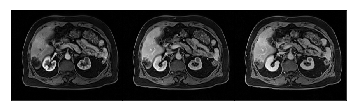

In [185]:
cls = "cyst"
accnum = "13112385"
img = np.load(C.full_img_dir + "\\" + cls + "\\" + accnum + ".npy")
hf.plot_section_auto(img)

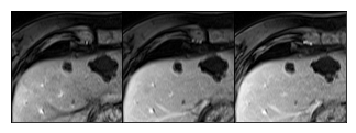

In [241]:
cls = "cyst"
accnum = "13112385"
img = np.load(C.crops_dir + cls + "\\" + accnum + "_0.npy")
hf.plot_section_auto(img)

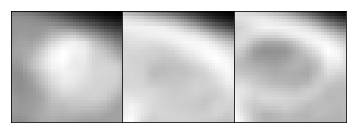

In [362]:
cls = "hcc"
#accnum = "12042703"
#img = np.load(C.orig_dir + cls + "\\" + accnum + "_0.npy")
img = np.load(C.orig_dir + cls + "\\" + os.listdir(C.orig_dir + cls)[18])
hf.plot_section_auto(img)

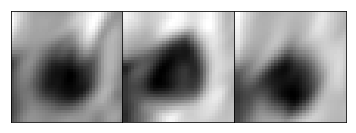

In [363]:
cls = "cyst"
accnum = "12042703"
img = np.load(C.aug_dir + cls + "\\" + accnum + "_0_0.npy")
hf.plot_section_auto(img)